<a href="https://colab.research.google.com/github/SamuelLawrence876/Analysing-Berling-AirBnB-Rental/blob/master/German_house_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
#WordCounting
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [277]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rc('font', size=16)

In [8]:
!cd ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"samuellawrence","key":"fdc2a7c542b86eef6eb0fe05cb0aec1a"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d brittabettendorf/berlin-airbnb-data

 95% 83.0M/87.7M [00:01<00:00, 59.2MB/s]
100% 87.7M/87.7M [00:01<00:00, 64.7MB/s]


In [10]:
import zipfile

zf = zipfile.ZipFile('berlin-airbnb-data.zip') 
df_calender_summary = pd.read_csv(zf.open('calendar_summary.csv'))
df_listings = pd.read_csv(zf.open('listings.csv'))
df_listings_summary = pd.read_csv(zf.open('listings_summary.csv'))
df_neighbourhoods = pd.read_csv(zf.open('neighbourhoods.csv'))
df_reviews1 = pd.read_csv(zf.open('reviews.csv'))
df_reviews_summary = pd.read_csv(zf.open('reviews_summary.csv'))

In [11]:
#df = pd.concat([df_listings, df_listings_summary, df_neighbourhoods, df_cal_summary], axis=1)
df_reviews = pd.concat([df_reviews1, df_reviews_summary], axis=1)

In [ ]:
df_calender_summary.shape

In [ ]:
df_listings.shape

In [ ]:
df_listings_summary.shape

In [ ]:
df_neighbourhoods.shape

In [ ]:
df_reviews.shape

In [ ]:
df_listings.tail()

In [ ]:
df_listings_summary.columns

In [72]:
df_listings_summary['room_type'].head()

0    Entire home/apt
1       Private room
2    Entire home/apt
3       Private room
4       Private room
Name: room_type, dtype: object

In [167]:
for i in df_listings_summary.columns:
    print("Column name {} and unique values are {}".format(i,len(df_listings_summary[i].unique())))

Column name id and unique values are 22552
Column name listing_url and unique values are 22552
Column name scrape_id and unique values are 1
Column name last_scraped and unique values are 2
Column name name and unique values are 21874
Column name summary and unique values are 21042
Column name space and unique values are 13599
Column name description and unique values are 21998
Column name experiences_offered and unique values are 1
Column name neighborhood_overview and unique values are 10782
Column name notes and unique values are 6688
Column name transit and unique values are 12309
Column name access and unique values are 9947
Column name interaction and unique values are 9585
Column name house_rules and unique values are 10351
Column name thumbnail_url and unique values are 1
Column name medium_url and unique values are 1
Column name picture_url and unique values are 22465
Column name xl_picture_url and unique values are 1
Column name host_id and unique values are 19180
Column name

In [179]:
df2 = df_listings_summary[['minimum_nights','street','maximum_nights','cleaning_fee','property_type','extra_people','zipcode',
                          'room_type','bed_type','review_scores_value', 'instant_bookable','host_has_profile_pic', 'requires_license','price']]

In [120]:
catagorical_features = df_listings_summary[['room_type','bed_type','review_scores_value', 'instant_bookable','host_has_profile_pic', 'requires_license','price']]

In [177]:
df = df_listings_summary[['minimum_nights','street','maximum_nights','cleaning_fee','property_type','extra_people','zipcode']]

In [ ]:
for Categorical_Values in catagorical_features.columns:
    cat_num = catagorical_features[Categorical_Values].value_counts()
    print('graph for %s: total = %d' % (Categorical_Values, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Based on our analysis we can conclude that:


*   Apparments are the predominant property type 
*   Supper hosts make up the minority of property renters
*   Mosts review range from 8 stars to 10
*   Most propertys are not instant bookable
*   Most people have just listen 1 house while some own 2 and 3 
*   Most listed propertys are not instant bookable
*   1 bedroom houses were among the most common 



In [ ]:
z, ax = plt.subplots(figsize=(20, 11))
sns.heatmap(catagorical_features.corr(), center=0,
            square=True, cmap="twilight", linewidths=1, cbar_kws={"shrink": 1})

In [115]:
catagorical_features.head(1)

,room_type,bed_type,review_scores_value,instant_bookable,host_has_profile_pic,requires_license,price
0,Entire home/apt,Real Bed,9.0,f,t,t,$60.00


In [121]:
catagorical_features['price'] = catagorical_features['price'].apply(lambda x: float(x.replace(',','').replace('$',''))) #Removing symbolls #Removing symbolls 

In [ ]:
catagorical_features['room_type'] = catagorical_features['room_type'].apply(lambda x: (x.replace('Entire home/apt','1').replace('Private room','2').replace('Shared room','3')))
catagorical_features['room_type'] = catagorical_features['room_type'].astype(int)

In [123]:
catagorical_features['bed_type'] = catagorical_features['bed_type'].apply(lambda x: (x.replace('Real Bed','1').replace('Pull-out Sofa','2').replace('Futon','3')).replace('Airbed','4'))
catagorical_features['bed_type'] = catagorical_features['room_type'].astype(int)

In [124]:
catagorical_features['instant_bookable'] = catagorical_features.host_has_profile_pic.map(dict(t=1, f=0))
catagorical_features['host_has_profile_pic'] = catagorical_features.host_has_profile_pic.map(dict(t=1, f=0))
catagorical_features['requires_license'] = catagorical_features.requires_license.map(dict(t=1, f=0))

In [165]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [171]:
cat_features=[x for x in df.columns if df[x].dtype=="object"]

le=LabelEncoder()

for col in cat_features:
    if col in df.columns:
        i = df.columns.get_loc(col)
        df.iloc[:,i] = df.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [172]:
#lbl_encoders={}
#for feature in df:
#  lbl_encoders[feature]=LabelEncoder()
#  df[feature] = lbl_encoders[feature].fit_transform(df[feature])

In [173]:
cat_features = np.stack([catagorical_features['room_type'], catagorical_features['bed_type'],catagorical_features['review_scores_value'],
                          catagorical_features['instant_bookable'],catagorical_features['host_has_profile_pic'],catagorical_features['requires_license']],1)

In [174]:
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[   0,    0,    7,    1,    1,    1],
        [   1,    1,    8,    1,    1,    1],
        [   0,    0,    7,    1,    1,    1],
        ...,
        [   0,    0,  134,    1,    1,    1],
        [   1,    1, 1649,    1,    1,    1],
        [   1,    1, 4443,    1,    1,    1]])

In [180]:
cont_features=[]
for i in df2.columns:
    if i in ['minimum_nights','street','maximum_nights','cleaning_fee','property_type','extra_people','zipcode']:
        pass
    else:
        cont_features.append(i)

In [182]:

cont_features

['room_type',
 'bed_type',
 'review_scores_value',
 'instant_bookable',
 'host_has_profile_pic',
 'requires_license',
 'price']

In [183]:
cont_values=np.stack([catagorical_features[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[0.0000e+00, 0.0000e+00, 7.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         5.4000e+01],
        [1.0000e+00, 1.0000e+00, 8.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         1.1000e+01],
        [0.0000e+00, 0.0000e+00, 7.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         8.4000e+01],
        ...,
        [0.0000e+00, 0.0000e+00, 1.3400e+02,  ..., 1.0000e+00, 1.0000e+00,
         7.9000e+01],
        [1.0000e+00, 1.0000e+00, 1.6490e+03,  ..., 1.0000e+00, 1.0000e+00,
         9.3000e+01],
        [1.0000e+00, 1.0000e+00, 4.4430e+03,  ..., 1.0000e+00, 1.0000e+00,
         3.9000e+01]])

In [184]:
y=torch.tensor(catagorical_features['price'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[54.],
        [11.],
        [84.],
        ...,
        [79.],
        [93.],
        [39.]])

In [185]:
catagorical_features.shape

(22552, 7)

In [186]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([22552, 6]), torch.Size([22552, 7]), torch.Size([22552, 1]))

In [200]:
cat_dims = [len(catagorical_features[col].unique()) for col in ['room_type','bed_type','review_scores_value', 'instant_bookable','host_has_profile_pic', 'requires_license']]

In [201]:
cat_dims

[3, 3, 4444, 28, 28, 2]

In [202]:
embedding_dim = [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [203]:
embedding_dim

[(3, 2), (3, 2), (4444, 50), (28, 14), (28, 14), (2, 1)]

In [204]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [205]:
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(3, 2)
  (1): Embedding(3, 2)
  (2): Embedding(4444, 50)
  (3): Embedding(28, 14)
  (4): Embedding(28, 14)
  (5): Embedding(2, 1)
)

In [206]:
cat_featuresz=cat_features[:6]
cat_featuresz

tensor([[0, 0, 7, 1, 1, 1],
        [1, 1, 8, 1, 1, 1],
        [0, 0, 7, 1, 1, 1],
        [1, 1, 7, 1, 1, 1],
        [1, 1, 7, 1, 1, 1],
        [0, 0, 8, 1, 1, 1]])

In [207]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [ ]:
embedding_val

In [210]:
z = torch.cat(embedding_val, 1)
z

tensor([[ 0.7256, -0.5763,  0.7455,  ...,  0.8696,  0.1237, -0.2942],
        [-0.3353, -0.0051,  0.7506,  ...,  0.8696,  0.1237, -0.2942],
        [ 0.7256, -0.5763,  0.7455,  ...,  0.8696,  0.1237, -0.2942],
        ...,
        [ 0.7256, -0.5763,  0.7455,  ...,  0.8696,  0.1237, -0.2942],
        [-0.3353, -0.0051,  0.7506,  ...,  0.8696,  0.1237, -0.2942],
        [-0.3353, -0.0051,  0.7506,  ...,  0.8696,  0.1237, -0.2942]],
       grad_fn=<CatBackward>)

In [211]:
droput=nn.Dropout(.4)

In [212]:
final_embed=droput(z)
final_embed

tensor([[ 0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000, -0.4903],
        [-0.0000, -0.0000,  0.0000,  ...,  1.4494,  0.2061, -0.4903],
        [ 1.2093, -0.0000,  1.2425,  ...,  1.4494,  0.2061, -0.4903],
        ...,
        [ 0.0000, -0.9606,  0.0000,  ...,  1.4494,  0.2061, -0.4903],
        [-0.0000, -0.0085,  0.0000,  ...,  0.0000,  0.2061, -0.0000],
        [-0.5589, -0.0000,  1.2510,  ...,  0.0000,  0.0000, -0.0000]],
       grad_fn=<MulBackward0>)

In [214]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [215]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [216]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [297]:
batch_size=22550
test_size=int(batch_size*0.30)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [298]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(15785, 6765, 15785, 6765, 15785, 6765)

In [299]:
epochs=1500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 0.19011136889457703
Epoch number: 11 and the loss : 0.1314036250114441
Epoch number: 21 and the loss : 0.23664866387844086
Epoch number: 31 and the loss : 0.20756246149539948
Epoch number: 41 and the loss : 0.3034913241863251
Epoch number: 51 and the loss : 0.2063155174255371
Epoch number: 61 and the loss : 0.22977536916732788
Epoch number: 71 and the loss : 0.11534150689840317
Epoch number: 81 and the loss : 0.1854086071252823
Epoch number: 91 and the loss : 0.12352684885263443
Epoch number: 101 and the loss : 0.1760406345129013
Epoch number: 111 and the loss : 0.14046542346477509
Epoch number: 121 and the loss : 0.32425060868263245
Epoch number: 131 and the loss : 0.22301174700260162
Epoch number: 141 and the loss : 0.1727079302072525
Epoch number: 151 and the loss : 0.19163167476654053
Epoch number: 161 and the loss : 0.16648568212985992
Epoch number: 171 and the loss : 0.17599435150623322
Epoch number: 181 and the loss : 0.1745576411485672
Epoch numbe

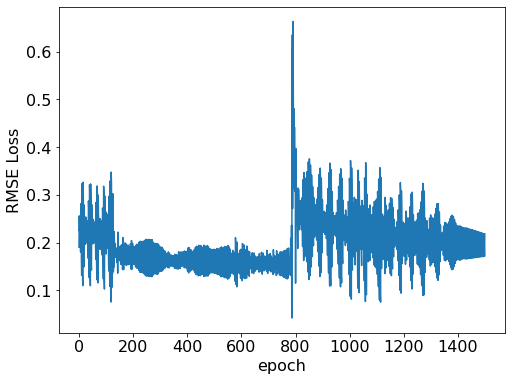

In [302]:
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [303]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 0.6337066292762756


In [304]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [305]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [306]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,34.0,34.142593,-0.142593
1,34.0,34.142723,-0.142723
2,14.0,14.257292,-0.257292
3,39.0,39.111877,-0.111877
4,74.0,73.926178,0.073822


In [307]:
final_output['Difference'].mean()

-0.014109148841739494

In [230]:
#### Saving The Model
#### Save the model
torch.save(model,'Kaggle_House_data.pt')

In [231]:
torch.save(model.state_dict(),'Kaggle_House_data.pt')

In [232]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [ ]:
model1.load_state_dict(torch.load('Kaggle_House_data.pt'))

In [ ]:
model.eval()

## An analysis on the most common words used in reviews & Property desciption

In [ ]:
words = " ".join(df['cleanLinks'])
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered if ele not in unwanted])
wc= WordCloud(background_color="gray", random_state=1,stopwords=STOPWORDS, max_words = 500, width =2000, height = 2000)
wc.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()